In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from time import perf_counter
from time import process_time
import timeit

In [2]:
# loading the dataset to a pandas DataFrame 
df = pd.read_csv("/kaggle/input/credit-card-undersample/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      df.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
target = 'Class'
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

Class
0    284315
1       492
Name: count, dtype: int64


Class
0    227451
1       394
Name: count, dtype: int64

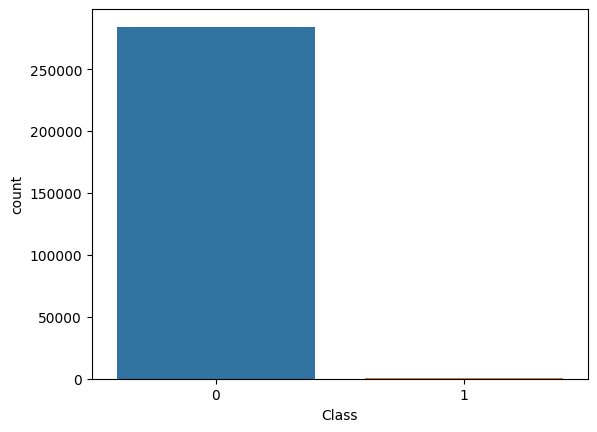

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)


ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())
Y_train[target].value_counts()

In [6]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


In [7]:
Y_train

,Class
223361,0
165061,0
238186,0
150562,0
138452,0
...,...
119879,0
259178,0
131932,0
146867,0


# Correlation before SMOTE

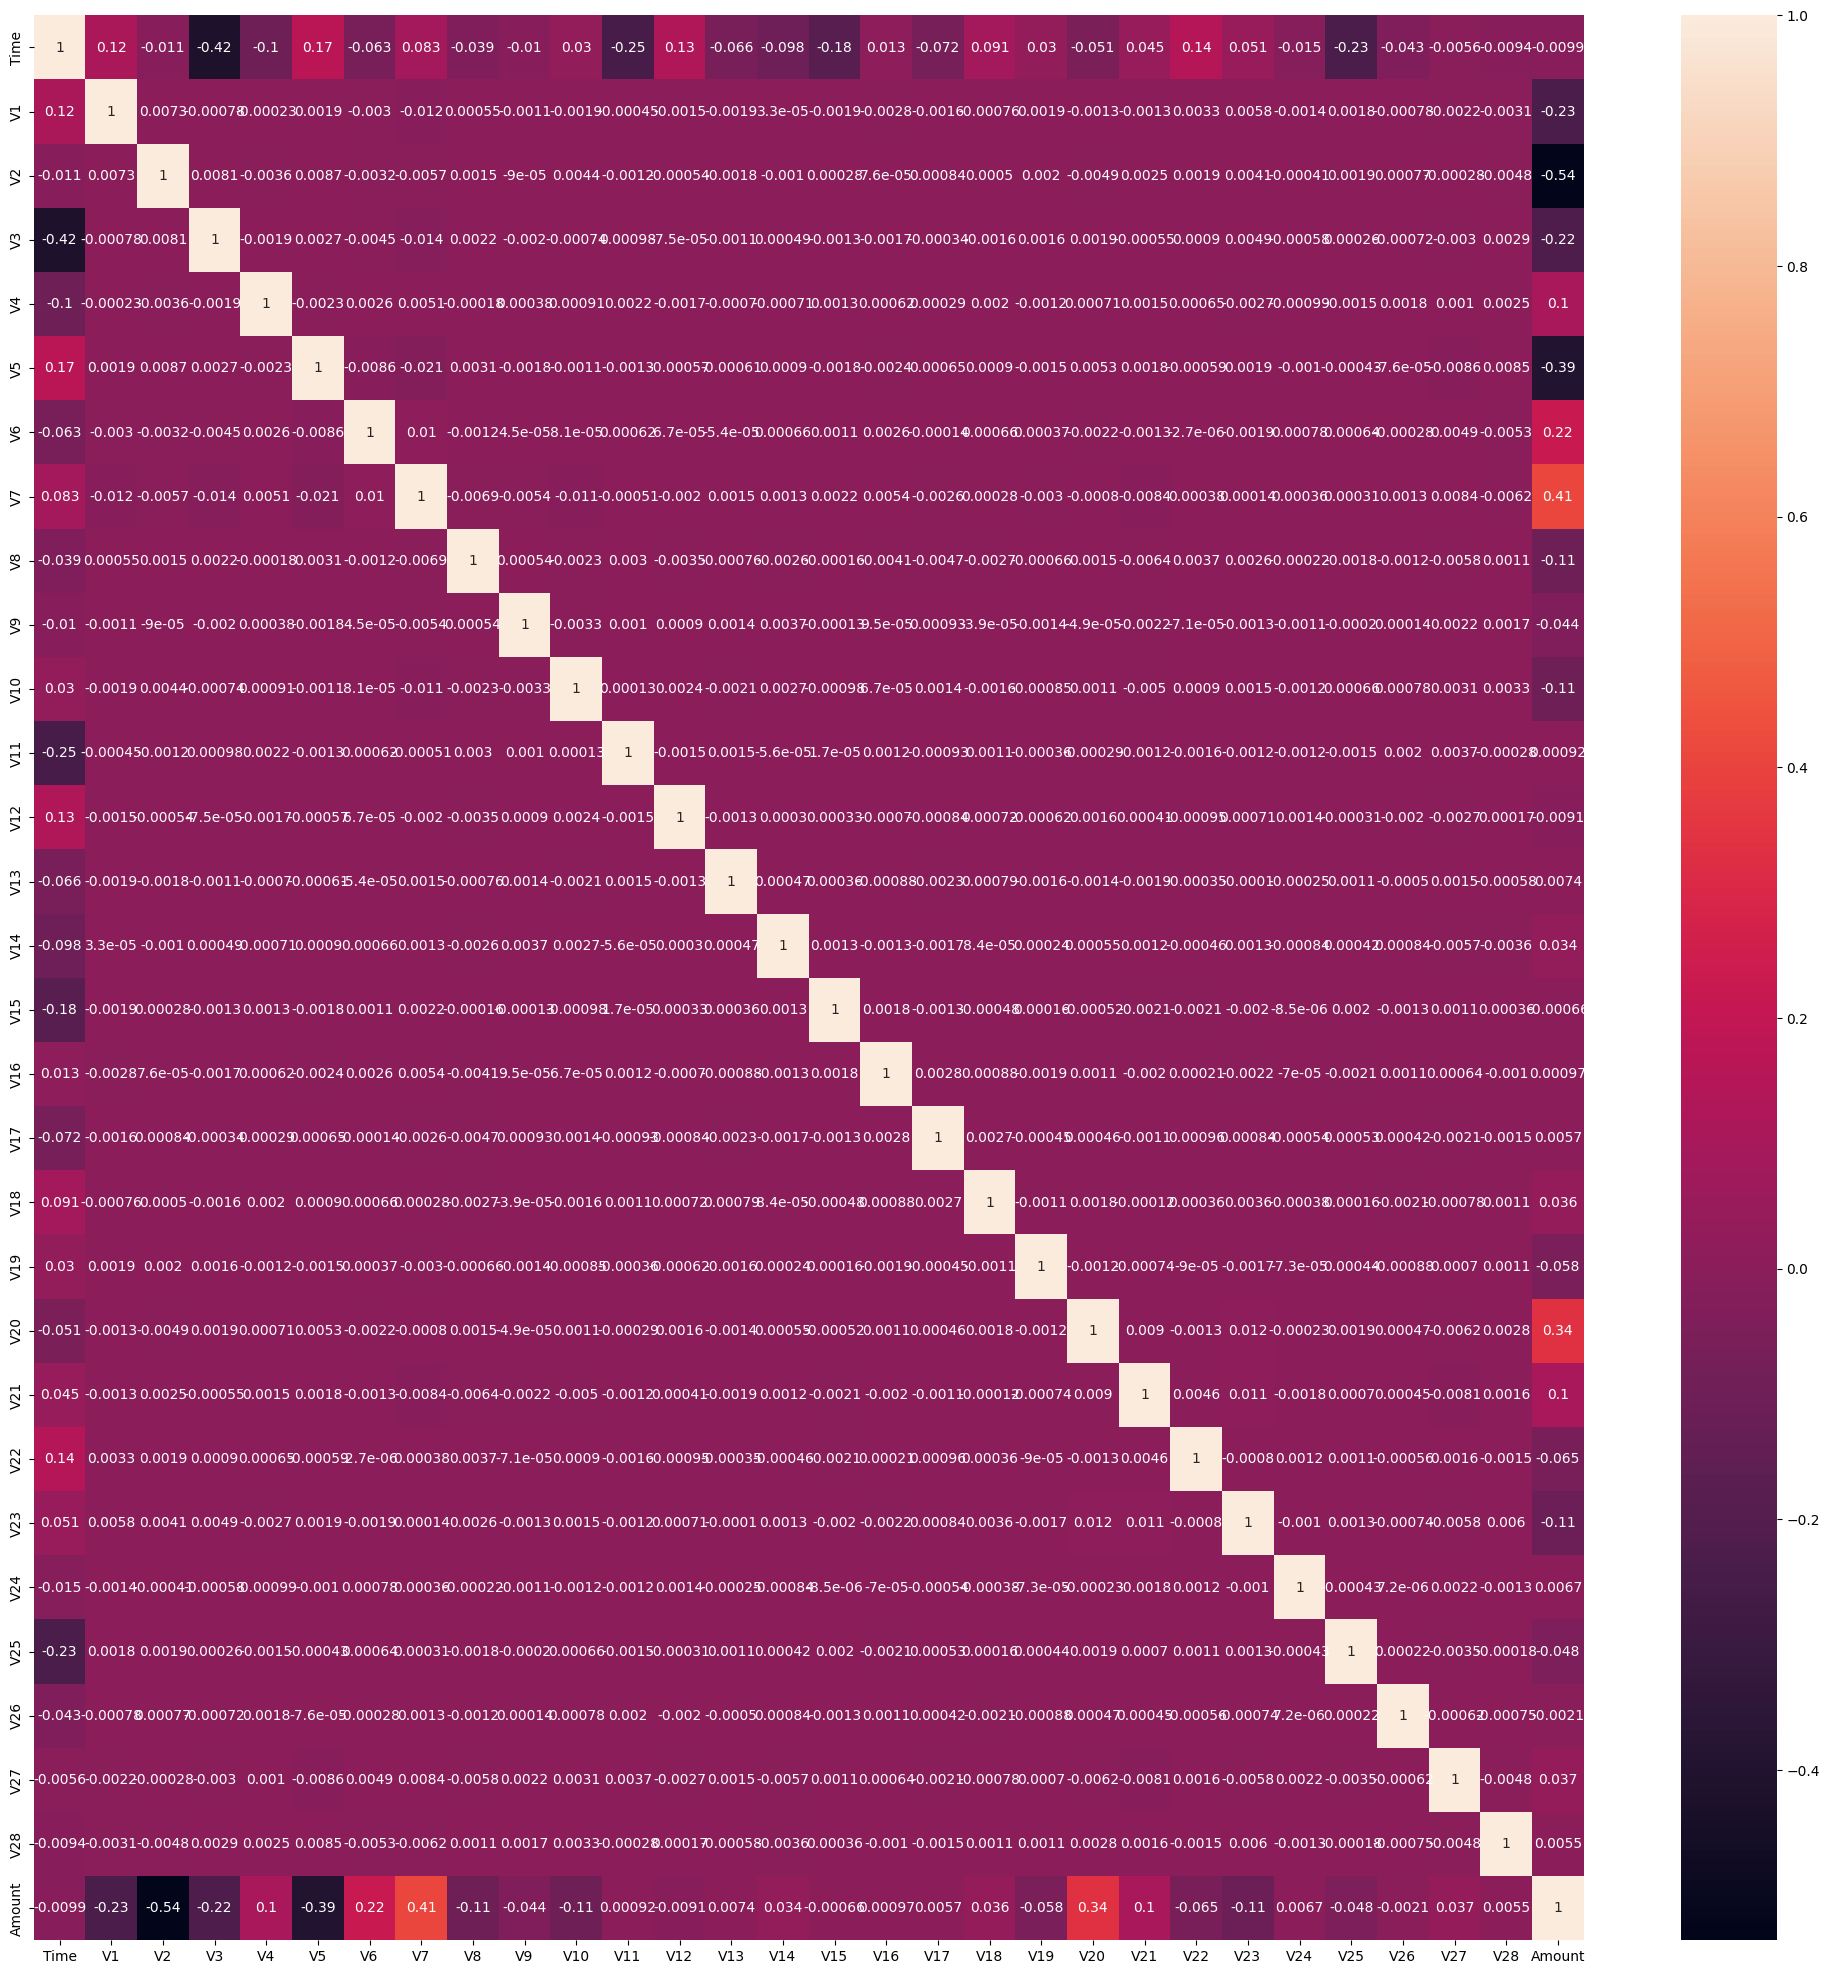

<Figure size 2500x2500 with 0 Axes>

In [8]:
X_train.corr()

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.figure(figsize=(25, 25), dpi=100)
plt.show()
def correlation(dataset, threshold):#dataset is X_train , threshold is a value which is may be 80% ,90% ,70%.. 
    col_corr = set()  # Set of all the names of correlated columns
    # using set() so no duplicate column contain here ...
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.95)

In [9]:
len(set(corr_features))

0

In [10]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X_train=x_train_res
Y_train=y_train_res

In [11]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,143352.000000,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.990000
1,117173.000000,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.900000
2,149565.000000,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.990000
3,93670.000000,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.440000
4,82655.000000,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,41139.288903,-4.672245,5.070271,-7.636822,7.528021,-6.949536,-1.773207,-8.276517,2.767726,-7.065673,...,1.637298,2.245313,0.548504,0.041102,0.591497,0.351393,0.374523,2.133736,0.944921,329.769372
454898,18275.265510,-12.885612,5.930993,-15.864035,10.443404,-3.708508,-3.050499,-14.849994,-1.297643,-6.031691,...,0.966632,-2.266429,0.225676,-3.192680,-0.717504,0.173497,0.665850,2.431572,-0.886009,1.284834
454899,155550.816770,0.508201,2.161775,-3.777326,3.705829,0.302453,-1.625310,-0.593478,0.212879,-2.211695,...,0.375037,0.282634,-0.090512,-0.063457,-0.261962,0.322438,0.342420,0.302770,0.161023,48.259955
454900,143442.242331,-2.458646,3.448899,-4.700197,5.859372,-0.845362,-1.331758,-3.767865,2.011206,-3.633724,...,0.280477,0.722354,-0.212428,-0.251274,-0.457646,0.328235,0.230334,0.503863,0.072291,1.000000


In [12]:
Y_train

,Class
0,0
1,0
2,0
3,0
4,0
...,...
454897,1
454898,1
454899,1
454900,1


Class
0    284315
1       492
Name: count, dtype: int64


Class
0    227451
1    227451
Name: count, dtype: int64

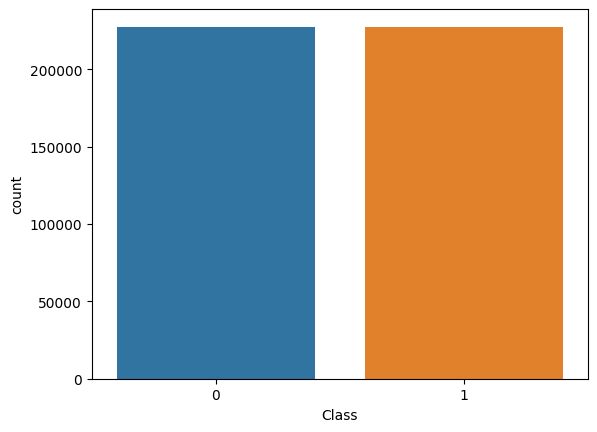

In [13]:
ax = sns.countplot(x=target, data=Y_train)
print(df[target].value_counts())
Y_train[target].value_counts()

In [14]:
X_train.shape
print(Y['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [15]:
X_train.shape

(454902, 30)

In [16]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass


def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [17]:
X=X_train
Y=Y_train

In [18]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,143352.000000,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.990000
1,117173.000000,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.900000
2,149565.000000,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.990000
3,93670.000000,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.440000
4,82655.000000,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,41139.288903,-4.672245,5.070271,-7.636822,7.528021,-6.949536,-1.773207,-8.276517,2.767726,-7.065673,...,1.637298,2.245313,0.548504,0.041102,0.591497,0.351393,0.374523,2.133736,0.944921,329.769372
454898,18275.265510,-12.885612,5.930993,-15.864035,10.443404,-3.708508,-3.050499,-14.849994,-1.297643,-6.031691,...,0.966632,-2.266429,0.225676,-3.192680,-0.717504,0.173497,0.665850,2.431572,-0.886009,1.284834
454899,155550.816770,0.508201,2.161775,-3.777326,3.705829,0.302453,-1.625310,-0.593478,0.212879,-2.211695,...,0.375037,0.282634,-0.090512,-0.063457,-0.261962,0.322438,0.342420,0.302770,0.161023,48.259955
454900,143442.242331,-2.458646,3.448899,-4.700197,5.859372,-0.845362,-1.331758,-3.767865,2.011206,-3.633724,...,0.280477,0.722354,-0.212428,-0.251274,-0.457646,0.328235,0.230334,0.503863,0.072291,1.000000


In [19]:
Y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
454897,1
454898,1
454899,1
454900,1


# Correlation after SMOTE

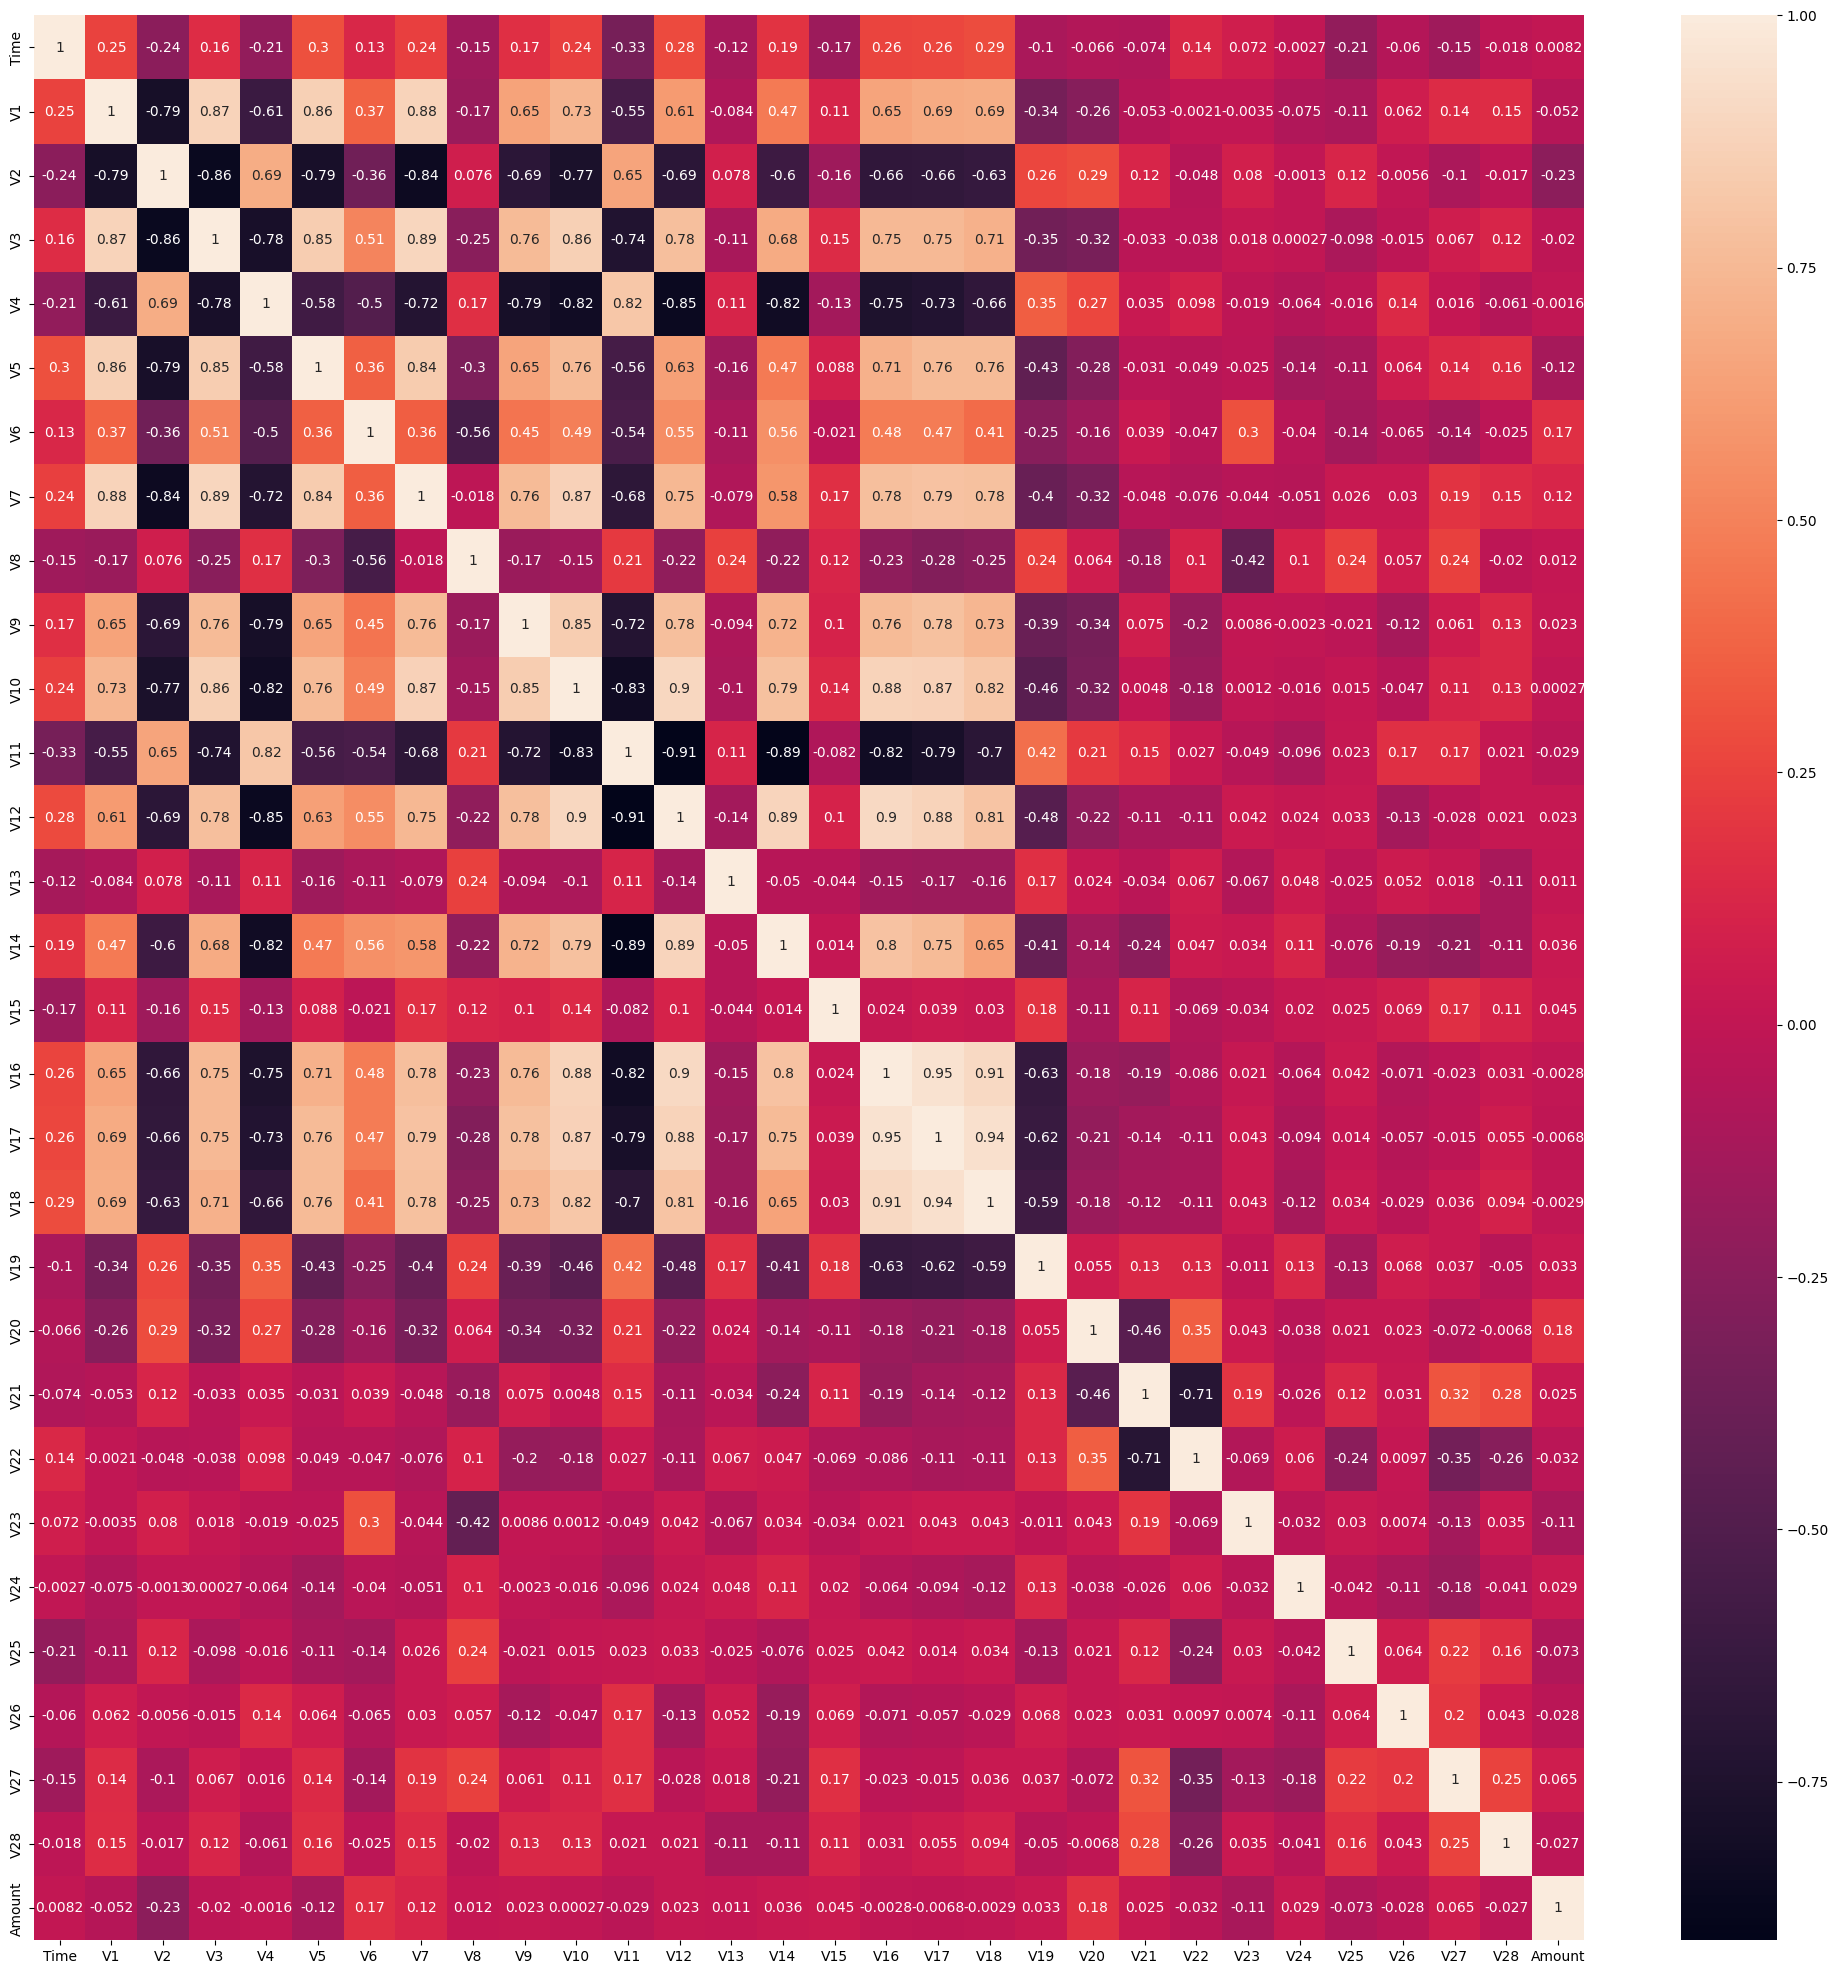

In [20]:
X_train.corr()

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()
def correlation(dataset, threshold):#dataset is X_train , threshold is a value which is may be 80% ,90% ,70%.. 
    col_corr = set()  # Set of all the names of correlated columns
    # using set() so no duplicate column contain here ...
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.95)

In [21]:
corr_features

{'V16'}

In [22]:
len(set(corr_features))

1

In [23]:
corr_features=['V16']

In [24]:
for col in corr_features:
    for col1 in X_train.columns:
        if col1==col:
            #print(col)
            del X_train[col]
            del X_test[col]
print(X_train)
print(X_test)

                 Time         V1        V2         V3         V4        V5  \
0       143352.000000   1.955041 -0.380783  -0.315013   0.330155 -0.509374   
1       117173.000000  -0.400975 -0.626943   1.555339  -2.017772 -0.107769   
2       149565.000000   0.072509  0.820566  -0.561351  -0.709897  1.080399   
3        93670.000000  -0.535045  1.014587   1.750679   2.769390  0.500089   
4        82655.000000  -4.026938  1.897371  -0.429786  -0.029571 -0.855751   
...               ...        ...       ...        ...        ...       ...   
454897   41139.288903  -4.672245  5.070271  -7.636822   7.528021 -6.949536   
454898   18275.265510 -12.885612  5.930993 -15.864035  10.443404 -3.708508   
454899  155550.816770   0.508201  2.161775  -3.777326   3.705829  0.302453   
454900  143442.242331  -2.458646  3.448899  -4.700197   5.859372 -0.845362   
454901   93861.226335  -8.369210  7.181820 -14.683987   8.845379 -9.102178   

              V6         V7        V8        V9  ...       V20 

In [25]:
#X_train=X

In [26]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,143352.000000,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.990000
1,117173.000000,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.900000
2,149565.000000,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.990000
3,93670.000000,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.440000
4,82655.000000,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,41139.288903,-4.672245,5.070271,-7.636822,7.528021,-6.949536,-1.773207,-8.276517,2.767726,-7.065673,...,1.637298,2.245313,0.548504,0.041102,0.591497,0.351393,0.374523,2.133736,0.944921,329.769372
454898,18275.265510,-12.885612,5.930993,-15.864035,10.443404,-3.708508,-3.050499,-14.849994,-1.297643,-6.031691,...,0.966632,-2.266429,0.225676,-3.192680,-0.717504,0.173497,0.665850,2.431572,-0.886009,1.284834
454899,155550.816770,0.508201,2.161775,-3.777326,3.705829,0.302453,-1.625310,-0.593478,0.212879,-2.211695,...,0.375037,0.282634,-0.090512,-0.063457,-0.261962,0.322438,0.342420,0.302770,0.161023,48.259955
454900,143442.242331,-2.458646,3.448899,-4.700197,5.859372,-0.845362,-1.331758,-3.767865,2.011206,-3.633724,...,0.280477,0.722354,-0.212428,-0.251274,-0.457646,0.328235,0.230334,0.503863,0.072291,1.000000


In [27]:
X=X_train

# After remove correlated feature

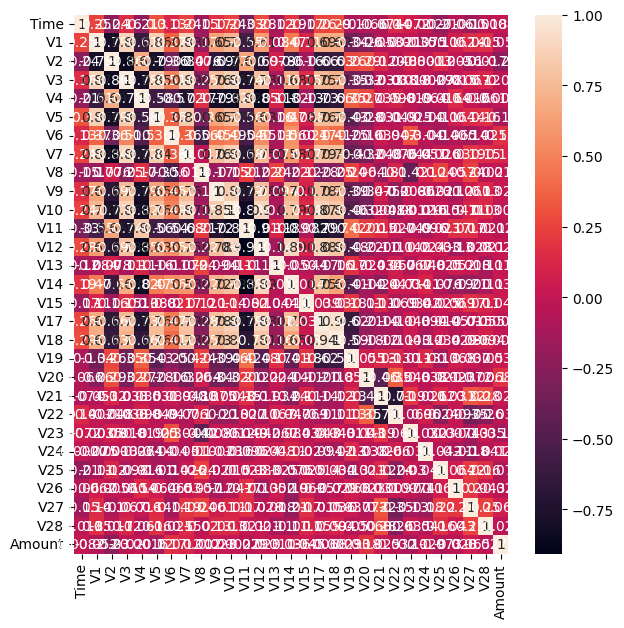

In [28]:
X_train.corr()

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(7,7))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()
def correlation(dataset, threshold):#dataset is X_train , threshold is a value which is may be 80% ,90% ,70%.. 
    col_corr = set()  # Set of all the names of correlated columns
    # using set() so no duplicate column contain here ...
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.95)

In [29]:
len(set(corr_features))

0

In [30]:
corr_features

set()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
rf.fit(X_train, Y_train)

/tmp/ipykernel_36/1162601971.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [32]:
rf.feature_importances_

array([0.00929074, 0.01360363, 0.01617251, 0.06294979, 0.08598244,
       0.00630957, 0.01058049, 0.03707915, 0.00737937, 0.01783516,
       0.16489737, 0.06343031, 0.10832554, 0.00424137, 0.19927411,
       0.00447948, 0.10909576, 0.01569175, 0.00552949, 0.00566708,
       0.01346464, 0.00342097, 0.00339547, 0.00330048, 0.00330031,
       0.00443001, 0.01028713, 0.00606838, 0.0045175 ])

In [33]:
#creating a table for checking the importance of different variables  
feat_imp=pd.DataFrame({"Features":X_train.columns,"Importance":rf.feature_importances_}).sort_values(by="Importance",ascending=False)


In [34]:
feat_imp

,Features,Importance
14,V14,0.199274
10,V10,0.164897
16,V17,0.109096
12,V12,0.108326
4,V4,0.085982
11,V11,0.063430
3,V3,0.062950
7,V7,0.037079
9,V9,0.017835
2,V2,0.016173


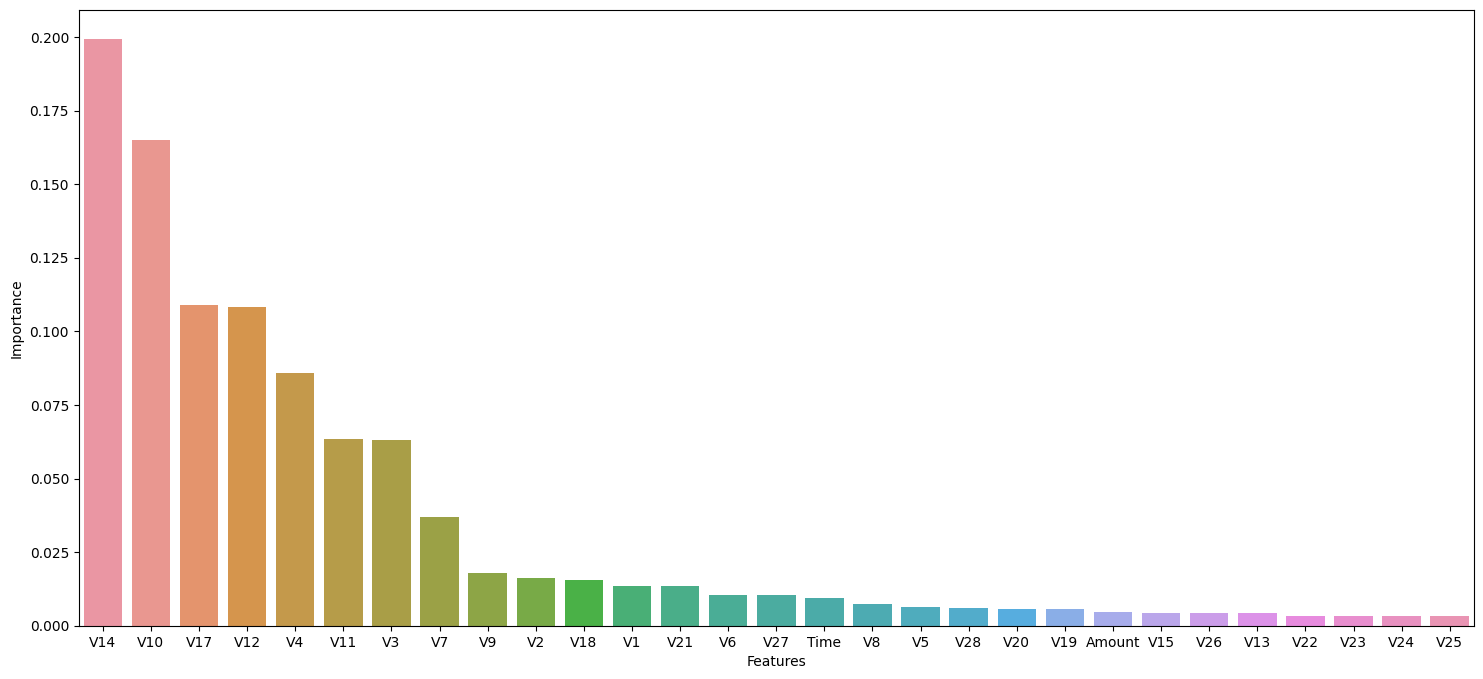

In [44]:
## visualizing the importance of variables
plt.figure(figsize=(18,8))
sns.barplot(data=feat_imp,x="Features",y="Importance")
plt.show()

In [36]:
#filtering out the variables having more than 1% impact on the model
feat_imp[feat_imp["Importance"]>0.0105]["Features"].unique()

array(['V14', 'V10', 'V17', 'V12', 'V4', 'V11', 'V3', 'V7', 'V9', 'V2',
       'V18', 'V1', 'V21', 'V6'], dtype=object)

In [37]:
## selecting the important variabels
X_train=X_train[['V14', 'V10', 'V17', 'V12', 'V4', 'V11', 'V3', 'V7', 'V9', 'V2','V18', 'V1', 'V21', 'V6']]

X_test=X_test[['V14', 'V10', 'V17', 'V12', 'V4', 'V11', 'V3', 'V7', 'V9', 'V2','V18', 'V1', 'V21', 'V6']]


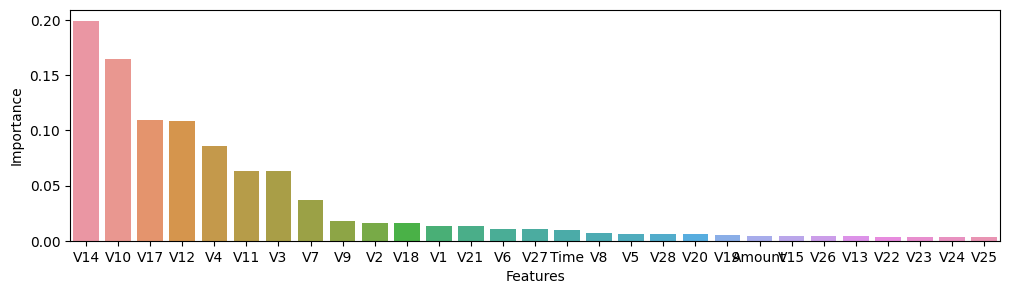

In [38]:
## visualizing the importance of variables
plt.figure(figsize=(12,3))
sns.barplot(data=feat_imp,x="Features",y="Importance")
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = pd.DataFrame(min_max.fit_transform(X_train), columns=X_train.columns)
X_train

,V14,V10,V17,V12,V4,V11,V3,V7,V9,V2,V18,V1,V21,V6
0,0.637537,0.616505,0.704083,0.767945,0.266566,0.322452,0.914254,0.261530,0.606194,0.763241,0.698111,0.991508,0.565319,0.262153
1,0.605929,0.632611,0.683756,0.676807,0.162484,0.169620,0.949870,0.265465,0.563425,0.760643,0.798195,0.951482,0.559005,0.264712
2,0.624526,0.601247,0.732419,0.701450,0.220461,0.316323,0.909563,0.270155,0.556187,0.775917,0.689188,0.959526,0.556407,0.259406
3,0.688797,0.631342,0.713311,0.546662,0.374695,0.234416,0.953590,0.270521,0.577393,0.777964,0.709340,0.949204,0.562504,0.273097
4,0.652364,0.647940,0.731356,0.764344,0.250619,0.313391,0.912068,0.262702,0.584328,0.787278,0.649453,0.889881,0.553731,0.258190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,0.189455,0.337077,0.038905,0.160037,0.585641,0.723046,0.774826,0.214934,0.263757,0.820757,0.022116,0.878918,0.597675,0.245192
454898,0.190053,0.307599,0.403894,0.185987,0.714878,0.854861,0.618158,0.174888,0.307361,0.829839,0.336176,0.739383,0.524944,0.232350
454899,0.461736,0.550544,0.701725,0.600962,0.416206,0.431192,0.848322,0.261740,0.468454,0.790068,0.652226,0.966927,0.566036,0.246679
454900,0.339185,0.487121,0.579835,0.484494,0.511671,0.525754,0.830748,0.242401,0.408485,0.803649,0.586399,0.916524,0.573124,0.249630


In [40]:
X_test = pd.DataFrame(
    min_max.transform(X_test),
    columns = X_test.columns
)

In [41]:
#X=X_train

# AdaBoost

In [42]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
classify_ = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

classify_ = classify_.fit(X_train,Y_train)

#Accuracy on training data
start_time = timeit.default_timer()

x_train_prediction = classify_.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data DT: , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()

x_test_prediction = classify_.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data DT:' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

# Hyperparameter for Decision Tree

In [ ]:
from sklearn import tree
classify_ = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 37, min_samples_leaf= 2, min_samples_split= 3,max_features=15,max_leaf_nodes=1200,splitter='best')
classify_ = classify_.fit(X_train,Y_train)

#Accuracy on training data
start_time = timeit.default_timer()

x_train_prediction = classify_.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data DT: , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()

x_test_prediction = classify_.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data DT:' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

# SHAP - DT

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(classify_)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values[1], X_test)

# LIME-DT

In [ ]:
import lime
import lime.lime_tabular
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
   data_row=X_test.iloc[1], #new data
    predict_fn = classify_.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True)

# Hyperparameter for XGBoost

In [ ]:
from xgboost import XGBClassifier
#n_estimators= 12, max_depth=7, learning_rate=0.2
model = XGBClassifier(colsample_bytree= 0.9747603118288211, gamma= 0.07353674046451897, learning_rate=0.28797628754844834, max_depth= 5, min_child_weight= 1, n_estimators=600, reg_alpha=0.6623597785186586, reg_lambda=4.586126640463295, subsample=0.8104028422110456)

model.fit(X_train, Y_train)

#Accuracy on training data
start_time = timeit.default_timer()
x_train_prediction = model.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()
x_test_prediction = model.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data XGBost:' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

# SHAP- XGBC

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

# LIME - XGBC

In [ ]:
import lime
import lime.lime_tabular
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
   data_row=X_test.iloc[1], #new data
    predict_fn = model.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True)

# Hyperparameter 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the RandomForest as the base estimator for AdaBoost
base_estimator = RandomForestClassifier(random_state=42)

# Create the AdaBoost classifier with RandomForest as the base estimator
ada_boost_rf = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'base_estimator__n_estimators': [10, 50, 100],  # Number of trees in Random Forest
    'base_estimator__max_depth': [3, 5, 7],         # Maximum depth of the trees
    'base_estimator__min_samples_split': [2, 5, 10], # Minimum number of samples to split
    'base_estimator__min_samples_leaf': [1, 2, 4],   # Minimum number of samples per leaf
    'n_estimators': [50, 100, 200],                 # Number of boosting rounds
    'learning_rate': [0.01, 0.005,0.1,0.5, 1.0]               # Learning rate
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=ada_boost_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred))


# Random Forest

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4,random_state=2010,criterion='entropy',n_estimators=150,verbose=False)

#rf = AdaBoostClassifier(base_estimator=RF, n_estimators=200, learning_rate=0.2,random_state=42)

rf.fit(X_train, Y_train)

start_time = timeit.default_timer()
x_train_prediction = rf.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 

start_time = timeit.default_timer()
x_test_prediction = rf.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data RF :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
#print(confusion_matrix(x_test_prediction,Y_test))
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True, cmap='red',fmt='g')

In [ ]:
ada_rf = AdaBoostClassifier(estimator=rf, n_estimators=50, random_state=42)

ada_rf.fit(X_train, Y_train)

start_time = timeit.default_timer()
x_train_prediction = ada_rf.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 

start_time = timeit.default_timer()
x_test_prediction = ada_rf.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data RF :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
#print(confusion_matrix(x_test_prediction,Y_test))
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)

# SHAP - RF

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure(figsize=(5, 5), dpi=600)
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values[1], X_test)

# LIME -RF

In [ ]:
import lime
import lime.lime_tabular
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
   data_row=X_test.iloc[1], #new data
    predict_fn = rf.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True)

# Hyperparameter for ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes=(50, 50, 50,50,5), learning_rate= 'constant',  solver= 'adam')

MLPC.fit(X_train,Y_train)

#Accuracy on training data

start_time = timeit.default_timer()

x_train_prediction = MLPC.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 

start_time = timeit.default_timer()

x_test_prediction = MLPC.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data ANN :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
#print(confusion_matrix(x_test_prediction,Y_test))
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

# SHAP ANN

In [ ]:
import shap

explainer = shap.DeepExplainer(MLPC, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values[1], X_test)

# LIME ANN

In [ ]:

from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train, mode='classification')

# Select an instance to explain
instance_idx = 0
instance = X_test[instance_idx].reshape(1, -1)

# Predict the probability for the instance
prediction = MLPC.predict(instance)

# Explain the prediction
explanation = explainer.explain_instance(X_test[instance_idx], model.predict, num_features=10)

# Display the explanation
explanation.show_in_notebook(show_table=True)

# Hyperparameter for KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors= 2,metric='minkowski',weights='uniform',algorithm='auto',leaf_size=2)

knn.fit(X_train,Y_train)

#Accuracy on training data
start_time =timeit.default_timer()

x_train_prediction = knn.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 

start_time =timeit.default_timer()
x_test_prediction  = knn.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data KNN :' ,test_data_accuracy)
Y_Test_Pred = knn.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

# SHAP -KNN

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

background_summary = shap.kmeans(X_train, 100) 

# Get the model explainer object
explainer = shap.KernelExplainer(knn.predict_proba,background_summary)

# Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
shap_values = explainer.shap_values(X_test)
#print("Variable Importance Plot - Global Interpretation")
#figure = plt.figure()
#shap.summary_plot(shap_values, X_test)

# LIME - KNN

In [ ]:
import lime
import lime.lime_tabular
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
   data_row=X_test.iloc[1], #new data
    predict_fn = knn.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True)

# ROC-AUC curve

In [ ]:
    y_pred_proba_dt = classify_.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    y_pred_proba_xb = model.predict_proba(X_test)[:, 1]
    fpr_xb, tpr_xb, thresholds = roc_curve(Y_test,  y_pred_proba_xb)
    auc_xb = roc_auc_score(Y_test, y_pred_proba_xb)
    
    y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, thresholds = roc_curve(Y_test,  y_pred_proba_rf)
    auc_rf = roc_auc_score(Y_test, y_pred_proba_rf)
    
    y_pred_proba_ann = MLPC.predict_proba(X_test)[:, 1]
    fpr_ann, tpr_ann, thresholds = roc_curve(Y_test,  y_pred_proba_ann)
    auc_ann = roc_auc_score(Y_test, y_pred_proba_ann)
    
    y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
    fpr_knn, tpr_knn, thresholds = roc_curve(Y_test,  y_pred_proba_knn)
    auc_knn = roc_auc_score(Y_test, y_pred_proba_knn)
    
   # y_pred_proba_cb = cb_clf.predict_proba(X_test)[:, 1]
    #fpr_cb, tpr_cb, thresholds = roc_curve(Y_test,  y_pred_proba_cb)
    #auc_cb = roc_auc_score(Y_test, y_pred_proba_cb)'''
    
    plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="DTC ="+str(auc_dt))
    plt.plot(fpr_xb,tpr_xb,linestyle='dotted',label="XGBC ="+str(auc_xb))
    plt.plot(fpr_rf,tpr_rf,linestyle='dashed',label="RFC ="+str(auc_rf))
    plt.plot(fpr_ann,tpr_ann,linestyle='-.',label="ANN ="+str(auc_ann))
    plt.plot(fpr_knn,tpr_knn,linestyle='dashdot',label="KNN ="+str(auc_knn))
    plt.title("ROC AUC Curve")
    plt.legend(loc=4)
    plt.show()

In [ ]:
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(Y_test,  y_pred_proba_rf)
auc_rf = roc_auc_score(Y_test, y_pred_proba_rf)

plt.figure(figsize=(5, 5), dpi=100)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(fpr_rf,tpr_rf,linestyle='dashed',label="RFC ="+str(auc_rf))
plt.title("ROC AUC Curve on Random Forest")
plt.legend(loc=4)
plt.show()

# Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
y_test_prob_xb=model.predict_proba(X_test)[:,1]
precision_xb, recall_xb,_ =precision_recall_curve(Y_test, y_test_prob_xb)
auc_score_xb=metrics.auc(recall_xb, precision_xb)
y_test_prob_dt=classify_.predict_proba(X_test)[:,1]
precision_dt, recall_dt,_ =precision_recall_curve(Y_test, y_test_prob_dt)
auc_score_dt=metrics.auc(recall_dt, precision_dt)
y_test_prob_knn=knn.predict_proba(X_test)[:,1]
precision_knn, recall_knn,_ =precision_recall_curve(Y_test, y_test_prob_knn)
auc_score_knn=metrics.auc(recall_knn, precision_knn)
y_test_prob_ann=MLPC.predict_proba(X_test)[:,1]
precision_ann, recall_ann,_ =precision_recall_curve(Y_test, y_test_prob_ann)
auc_score_ann=metrics.auc(recall_ann, precision_ann)
plt.figure(figsize=(5,5))
plt.plot(recall_rf, precision_rf, marker='',label="RFC="+str(auc_score_rf))
plt.plot(recall_knn, precision_knn, marker='',label="KNN="+str(auc_score_knn))
plt.plot(recall_ann, precision_ann, marker='',label="ANN="+str(auc_score_ann))
plt.plot(recall_dt, precision_dt, marker='',label="DTC="+str(auc_score_dt))
plt.plot(recall_xb, precision_xb, marker='',label="XGBC="+str(auc_score_xb))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

In [ ]:
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)

plt.figure(figsize=(5,5))
plt.plot(recall_rf, precision_rf, marker='',label="RFC="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve on Feature Selection")
plt.legend()
plt.show()